In [35]:
from __future__ import division
import numpy as np
import tensorflow as tf
from tensorflow import nn
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
sess = tf.Session()

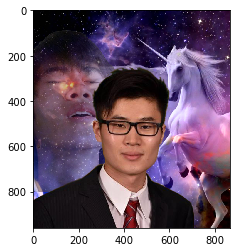

In [37]:
#image = rgb = plt.imread('ikedasex2.png')
d = 4
image = plt.imread('sleepikeda2.png')
image = plt.imread('algorithmboikeda2.png')
#image = plt.imread('minikeda2.jpg')
plt.imshow(image)
image = image[::d,::d,:3]

In [38]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray
image = rgb2gray(image)

[[-0.125 -0.125 -0.125]
 [-0.125  1.    -0.125]
 [-0.125 -0.125 -0.125]]


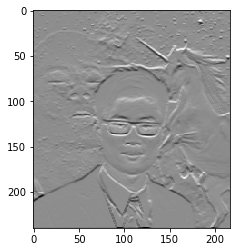

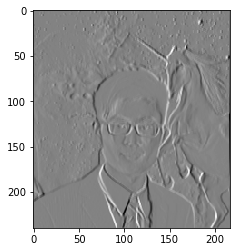

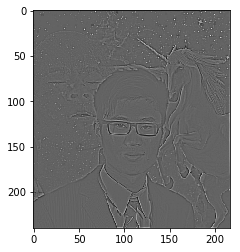

In [39]:
sharpen = np.full((3,3), -1/8)
sharpen[1,1]=1
horiz = np.zeros((3,3))
horiz[0,:] = -1
horiz[2,:] = 1
vert = horiz.T
print(sharpen)
inp = image[None,:,:,None]
for kernel in [horiz, vert, sharpen]:
    W = kernel[:,:,None,None]
    out_t = nn.conv2d(inp, W, [1,1,1,1], 'SAME')
    out_np = out_t.eval(session=sess)

    plt.imshow(out_np.squeeze(), cmap='gray')
    plt.show()